### Import Library

In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Load File

In [4]:
train_claims_json_data = json.load(open("data/train-claims.json"))
dev_claims_json_data = json.load(open("data/dev-claims.json"))
evidence_json_data = json.load(open("data/evidence.json"))

label_tags = ["SUPPORTS", "REFUTES", "NOT_ENOUGH_INFO", "DISPUTED"]

In [5]:
train_claims_normalised_data = [{"tag": key,
                      "claim_text": value["claim_text"],
                      "evidences":value["evidences"],
                      "label": value["claim_label"]
                      } for (key, value) in train_claims_json_data.items()]

dev_claims_normalised_data = [{"tag": key,
                      "claim_text": value["claim_text"],
                      "evidences":value["evidences"],
                      "label": value["claim_label"]
                      } for (key, value) in dev_claims_json_data.items()]

evidence_normalised_data = [{"tag": key,
                  "evidence": value
                  } for (key, value) in evidence_json_data.items()]

train_claims_data = pd.json_normalize(train_claims_normalised_data)
dev_claims_data = pd.json_normalize(dev_claims_normalised_data)
evidence_data = pd.json_normalize(evidence_normalised_data)

In [15]:
print(f"Train set size:    {train_claims_data.shape[0]}")
print(f"Dev set size:      {dev_claims_data.shape[0]}")
print(f"Evidence set size: {evidence_data.shape[0]}")


Train set size:    1228
Dev set size:      154
Evidence set size: 1208827


In [18]:
cata_0_num = train_claims_data.loc[train_claims_data["label"] == label_tags[0]].shape[0]
cata_1_num = train_claims_data.loc[train_claims_data["label"] == label_tags[1]].shape[0]
cata_2_num = train_claims_data.loc[train_claims_data["label"] == label_tags[2]].shape[0]
cata_3_num = train_claims_data.loc[train_claims_data["label"] == label_tags[3]].shape[0]

In [20]:
print(f"Size of [{label_tags[0]: ^18}] instants: {cata_0_num}")
print(f"Size of [{label_tags[1]: ^18}] instants: {cata_1_num}")
print(f"Size of [{label_tags[2]: ^18}] instants: {cata_2_num}")
print(f"Size of [{label_tags[3]: ^18}] instants: {cata_3_num}")

Size of [     SUPPORTS     ] instants: 519
Size of [     REFUTES      ] instants: 199
Size of [ NOT_ENOUGH_INFO  ] instants: 386
Size of [     DISPUTED     ] instants: 124


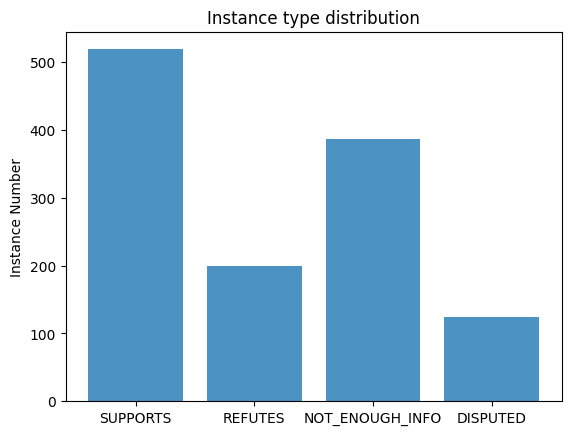

In [47]:
x_pos = np.arange(len(label_tags))
instance_num = [cata_0_num, cata_1_num, cata_2_num, cata_3_num]

plt.bar(x_pos, instance_num, align='center', alpha=0.8)
plt.xticks(x_pos, label_tags)
plt.ylabel('Instance Number')
plt.title('Instance type distribution')

plt.show()

### Claim Text Analysis

In [48]:
train_claims_data["claim_text_len"] = train_claims_data["claim_text"].apply(lambda x: len(x))

In [49]:
print(f"Longest Text:  {train_claims_data['claim_text_len'].max()}")
print(f"Shortest Text: {train_claims_data['claim_text_len'].min()}")
print(f"Average Text Len: {train_claims_data['claim_text_len'].mean(): .4f}")

Longest Text:  332
Shortest Text: 26
Average Text Len:  122.9552


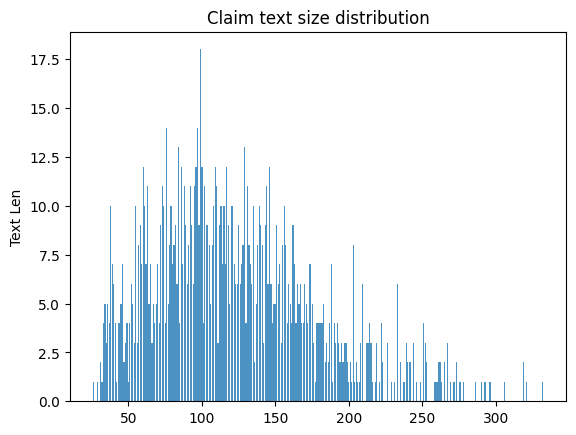

In [50]:
train_claim_len_size_counts = train_claims_data.groupby(by=["claim_text_len"]).size().reset_index(name='counts')

X_pos = train_claim_len_size_counts["claim_text_len"]
len_count = train_claim_len_size_counts["counts"]

plt.bar(X_pos, len_count, align='center', alpha=0.8)
plt.ylabel('Text Len')
plt.title('Claim text size distribution')

plt.show()